# Part I- Research Question

## A. Research Question: What are the relationships between the given factors of overweight, age, and doctor's visits?

### Installing the needed packages for the performance assessment.

In [44]:
install.packages("readr")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("psych")
install.packages("modeest")
install.packages("visdat")
install.packages("factoextra")
install.packages("ggstatsplot")
install.packages("tidyverse")
install.packages("plyr")
install.packages("mice")
install.packages("outliers")

Warning message:
"package 'readr' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'tidyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\RtmpG6LLcs\downloaded_packages


Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'modeest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\RtmpG6LLcs\downloaded_packages


Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'visdat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\RtmpG6LLcs\downloaded_packages


Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\RtmpG6LLcs\downloaded_packages


Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggstatsplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\RtmpG6LLcs\downloaded_packages


Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'plyr' is in use and will not be installed"
Warning message:
"package 'mice' is in use and will not be installed"
Warning message:
"package 'outliers' is in use and will not be installed"


### Loading the packages that are needed for the data cleaning process.

In [45]:
library(readr) # for importing data
library(plyr) # to change the data type to numeric.
library(dplyr) # is used for data manipulation
library(ggplot2) # for visualization
library(FactoMineR) # to conduct the PCA
library(tidyverse) # to tidy and clean the data
library(mice) # for null value mitigation
library(outliers) # to check for outliers

### Loading in the medical data set to begin cleaning it.

In [46]:
library(readr)
medical_raw_data <- read_csv("~/WGU/Data Cleaning/Medical_Data/medical_raw_data.csv", show_col_types= FALSE)
# Viewing my data's first 10 rows to see what I have to work with using the head command.
head(medical_raw_data, 10)

New names:
* `` -> `...1`


...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,35621,34.34960,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,NA,NA,NA,NA,NA,NA,32446,30.84513,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,NA,NA,NA,NA,NA,NA,57110,43.54321,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,NA,NA,NA,NA,NA,NA,56072,43.89744,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,NA,NA,NA,NA,NA,NA,23181,37.59894,...,1885.655,3716.526,2,1,3,3,5,3,4,3
6,6,NA,NA,NA,NA,NA,NA,74423,35.67302,...,2774.090,12742.590,4,5,4,4,3,5,4,6
7,7,NA,NA,NA,NA,NA,NA,44086,41.67511,...,3533.292,16815.514,4,3,3,2,3,4,5,5
8,8,NA,NA,NA,NA,NA,NA,22641,39.08062,...,3316.400,6930.572,1,2,2,5,4,2,4,2
9,9,NA,NA,NA,NA,NA,NA,32404,30.20097,...,2922.760,8363.187,3,3,2,3,3,3,4,2


##### Viewing all of the column names below to see what I have to work with.

In [47]:
colnames(medical_raw_data)

[1] "...1"                   "CaseOrder"              "Customer_id"           
 [4] "Interaction"            "UID"                    "City"                  
 [7] "State"                  "County"                 "Zip"                   
[10] "Lat"                    "Lng"                    "Population"            
[13] "Area"                   "Timezone"               "Job"                   
[16] "Children"               "Age"                    "Education"             
[19] "Employment"             "Household_Income"       "Marital"               
[22] "Gender"                 "ReAdmis"                "VitD_levels"           
[25] "Doc_visits"             "Full_meals_eaten"       "VitD_supp"             
[28] "Soft_drink"             "Initial_admin"          "HighBlood"             
[31] "Stroke"                 "Complication_risk"      "Overweight"            
[34] "Arthritis"              "Diabetes"               "Hyperlipidemia"        
[37] "BackPain"               "Anxiety"                "Allergic_rhinitis"     
[40] "Reflux_esophagitis"     "Asthma"                 "Services"              
[43] "Initial_days"           "TotalCharge"            "Additional_charges"    
[46] "Survey_TimelyAdmin"     "Survey_TimelyTreatment" "Survey_TimelyVisits"   
[49] "Survey_Reliability"     "Survey_Options"         "Survey_HoursTreatment" 
[52] "Survey_CourteousStaff"  "Survey_ActiveListening"

## Part I- B. Variable Description

In [48]:
str(medical_raw_data)

spec_tbl_df [10,000 x 53] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1                  : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CaseOrder             : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id           : logi [1:10000] NA NA NA NA NA NA ...
 $ Interaction           : logi [1:10000] NA NA NA NA NA NA ...
 $ UID                   : logi [1:10000] NA NA NA NA NA NA ...
 $ City                  : logi [1:10000] NA NA NA NA NA NA ...
 $ State                 : logi [1:10000] NA NA NA NA NA NA ...
 $ County                : logi [1:10000] NA NA NA NA NA NA ...
 $ Zip                   : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat                   : num [1:10000] 34.3 30.8 43.5 43.9 37.6 ...
 $ Lng                   : num [1:10000] -86.7 -85.2 -96.6 -93.5 -76.9 ...
 $ Population            : num [1:10000] 2951 11303 17125 2162 5287 ...
 $ Area                  : logi [1:10000] NA NA NA NA NA NA ...
 $ Timezone              : logi [1:10000] NA NA NA NA NA NA ..

# Variable and data type description:
- ...1: is an unnamed integer index
- CaseOrder: integer index to preserve the original order of the raw data
- Customer_id: character string that is unique and identifies each patient through an ID
- Interaction: character string that is unique and identifies patient transactions, procedures, and admissions
- UID: character string that is unique and identifies patient transactions, procedures, and admissions
- City: character string indicating patient's city of residence; listed on the billing statement
- State: character string indicating patient's state of residence; listed on the billing statement
- County: character string indicating patient's county of residence; listed on the billing statement
- Zip: integer indicating patient's zip code of residence; listed on the billing statement
- Lat: continuous numeric of latitude GPS coordinates of residence; listed on the billing statement
- Lng: continuous numeric of longitude GPS coordinates of residence; listed on the billing statement
- Population: integer value indicating population within a mile radius of a patient, based on census data
- Area: a nominal categorical indicating character string area type (rural, urban, suburban), based on unofficial census data
- Timezone: a nominal categorical string indicating character string indicating the time zone of patient residence based on the patient’s sign-up information
- Job: a nominal categorical string indicating the job of the patient (or primary insurance holder) as reported in the admissions information
- Children: float indicating the number of children in the patient’s household as reported in the admissions information
- Age: float indicating the age of the patient as reported in admissions information
- Education: a nominal categorical string indicating the highest earned degree of a patient as reported in admissions information
- Employment: a categorical string indicating the employment status of a patient as reported in admissions information
- Income: numerical indicating the annual income of the patient (or primary insurance holder) as reported at the time of admission
- Marital: a nominal categorical string indicating the marital status of the patient (or primary insurance holder) as reported on admission information
- Gender: a nominal categorical string indicating the customer's self-identification as male, female, or nonbinary
- ReAdmis: a binary categorical string indicating whether the patient was readmitted within a month of release or not (yes, no)
- VitD_levels: continuous numerical indicating the patient’s vitamin D levels as measured in ng/mL
- Doc_visits: integer indicating the number of times the primary physician visited the patient during the initial hospitalization
- Full_meals_eaten: integer the number of complete meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)
- VitD_supp: integer indicating the number of times that vitamin D supplements were administered to the patient 
- Soft_drink: a binary categorical string indicating whether the patient habitually drinks three or more sodas in a day (yes, no)
- Initial_admin: a nominal categorical string indicating how the patient was admitted into the hospital initially (emergency admission, elective admission, observation)
- HighBlood: a character string indicating whether the patient has high blood pressure (yes, no)
- Stroke: a character string indicating whether the patient has had a stroke (yes, no)
- Complication_risk: a string indicating the level of complication risk for the patient as assessed by a primary patient assessment (high, medium, low)
- Overweight: an integer indicating whether the patient is considered overweight based on age, gender, and height (yes, no)
- Arthritis: a character string indicating whether the patient has arthritis (yes, no)
- Diabetes: a character string indicating whether the patient has diabetes (yes, no)
- Hyperlipidemia: a character string indicating whether the patient has hyperlipidemia (yes, no)
- BackPain: a character string indicating whether the patient has chronic back pain (yes, no)
- Anxiety: an integer indicating whether the patient has an anxiety disorder (yes, no)
- Allergic_rhinitis: a character string indicating whether the patient has allergic rhinitis (yes, no)
- Reflux_esophigitis: a character string indicating whether the patient has reflux esophagitis (yes, no)
- Asthma: a character string indicating whether the patient has asthma (yes, no)
- Services: a character string indicating primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI)
- Initial_days: numerical, indicating the number of days the patient stayed in the hospital during the initial visit
- TotalCharge: numerical, indicating the amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients, not including specialized treatments.
- Additional_charges: numerical, indicating the average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc.
The following variables describe an eight-question survey asking customers to rate their experience on a scale from 1 to 8. The number one represents the most important and 8 represents the least important:
- Item1: an integer that describes a timely admission
- Item2: an integer that describes a timely treatment
- Item3: an integer that describes timely visits
- Item4: an integer that describes the reliability
- Item5: an integer that describes options
- Item6: an integer that describes hours of treatment
- Item7: an integer that describes courteous staff
- Item8: an integer that describes evidence of active listening from a doctor

# Part II: Data-Cleaning Plan

## C. Plan
- 1. Rename misleading variables
- 2. Remove irrelevant variables
- 3. Missing data
    - Find missing data
    - Identify the columns the missing data is in
- 4. Convert categorical data types into numeric
- 5. Check for outliers using boxplot and distribution graphs
- 6. Run a hypothesis test for those variables using a Grubbs Test
- 7. Mitigate NAs
- 8. Standardize the variables that need to be standardized
- 9. To assess the quality and clean the data, I will be using R which was created by statisticians. R has a massive library of packages for data cleaning, exploration, statistical analysis, machine modeling and learning, and reporting. I will be using the following packages to support my data cleaning:
    - readr is used to import data
    - dplyr is used for data manipulation
    - ggplot2 is used for visualization/plots
    - FactoMineR is used to conduct the PCA
    - tidyverse is used to tidy and clean the data
    - plyr is used to change the data type to numeric.
    - mice is used for null value mitigation
    - outliers is used to check for outliers
- 10. I have provided the code in its entirety below to identify the anomalies in the data

# Part III- D: Apply the Cleaning Plan

### 1- First, I renamed the survey variables to names that are easier to understand for cleaning purposes since the survey questions were called items.

In [49]:
names(medical_raw_data)[names(medical_raw_data) == 'Income'] <- 'Household_Income'
names(medical_raw_data)[names(medical_raw_data) == 'Item1'] <- 'Survey_TimelyAdmin'
names(medical_raw_data)[names(medical_raw_data) == 'Item2'] <- 'Survey_TimelyTreatment'
names(medical_raw_data)[names(medical_raw_data) == 'Item3'] <- 'Survey_TimelyVisits'
names(medical_raw_data)[names(medical_raw_data) == 'Item4'] <- 'Survey_Reliability'
names(medical_raw_data)[names(medical_raw_data) == 'Item5'] <- 'Survey_Options'
names(medical_raw_data)[names(medical_raw_data) == 'Item6'] <- 'Survey_HoursTreatment'
names(medical_raw_data)[names(medical_raw_data) == 'Item7'] <- 'Survey_CourteousStaff'
names(medical_raw_data)[names(medical_raw_data) == 'Item8'] <- 'Survey_ActiveListening'
head(medical_raw_data)

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,35621,34.34960,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,NA,NA,NA,NA,NA,NA,32446,30.84513,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,NA,NA,NA,NA,NA,NA,57110,43.54321,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,NA,NA,NA,NA,NA,NA,56072,43.89744,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,NA,NA,NA,NA,NA,NA,23181,37.59894,...,1885.655,3716.526,2,1,3,3,5,3,4,3
6,6,NA,NA,NA,NA,NA,NA,74423,35.67302,...,2774.090,12742.590,4,5,4,4,3,5,4,6


### 2- I am dropping the unnamed variable "...1" since that will not tell me anything about my data.

In [50]:
medical_raw_data <- medical_raw_data[ -c(1) ]

### Viewing my data's head to make sure the unnamed variables are no longer there.

In [51]:
head(medical_raw_data, 5)

CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,NA,NA,35621,34.34960,-86.72508,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,NA,NA,NA,NA,NA,NA,32446,30.84513,-85.22907,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,NA,NA,NA,NA,NA,NA,57110,43.54321,-96.63772,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,NA,NA,NA,NA,NA,NA,56072,43.89744,-93.51479,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,NA,NA,NA,NA,NA,NA,23181,37.59894,-76.88958,...,1885.655,3716.526,2,1,3,3,5,3,4,3


### Variable ...1 is no longer there!

# 3- Search for NA values in columns across the entire dataset

In [52]:
colSums(is.na(medical_raw_data))

CaseOrder            Customer_id            Interaction 
                     0                  10000                  10000 
                   UID                   City                  State 
                 10000                  10000                  10000 
                County                    Zip                    Lat 
                 10000                      0                      0 
                   Lng             Population                   Area 
                     0                      0                  10000 
              Timezone                    Job               Children 
                 10000                  10000                      0 
                   Age              Education             Employment 
                     0                  10000                  10000 
      Household_Income                Marital                 Gender 
                     0                  10000                  10000 
               ReAdmis            VitD_levels             Doc_visits 
                 10000                      0                      0 
      Full_meals_eaten              VitD_supp             Soft_drink 
                     0                      0                  10000 
         Initial_admin              HighBlood                 Stroke 
                 10000                  10000                  10000 
     Complication_risk             Overweight              Arthritis 
                 10000                      0                  10000 
              Diabetes         Hyperlipidemia               BackPain 
                 10000                  10000                  10000 
               Anxiety      Allergic_rhinitis     Reflux_esophagitis 
                     0                  10000                  10000 
                Asthma               Services           Initial_days 
                 10000                  10000                   1056 
           TotalCharge     Additional_charges     Survey_TimelyAdmin 
                     0                      0                      0 
Survey_TimelyTreatment    Survey_TimelyVisits     Survey_Reliability 
                     0                      0                      0 
        Survey_Options  Survey_HoursTreatment  Survey_CourteousStaff 
                     0                      0                      0 
Survey_ActiveListening 
                     0

### The results for NA values in columns are the following:
- Children = 2588
- Age = 2414
- Household_Income = 2464
- Soft_drink = 2467
- Overweight = 982
- Anxiety = 984
- Initial_days = 1056

# Let's search for missing data using the ncol function to see if there's a specific number of columns.

In [53]:
ncol(medical_raw_data$Children)

NULL

#### The output is NULL since the variables contain NA values. This confirms that, indeed, this is correct. Now, we take a look at the distribution using the mice packages, which is an excellent choice for large data to see the location. Let's use the md.pattern function.

*I will use the md.pattern function to display all of the NULL values below.*

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Household_Income,VitD_levels,Doc_visits,...,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,
8944,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,27
1056,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,28
,0,0,0,0,0,0,0,0,0,0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,271056


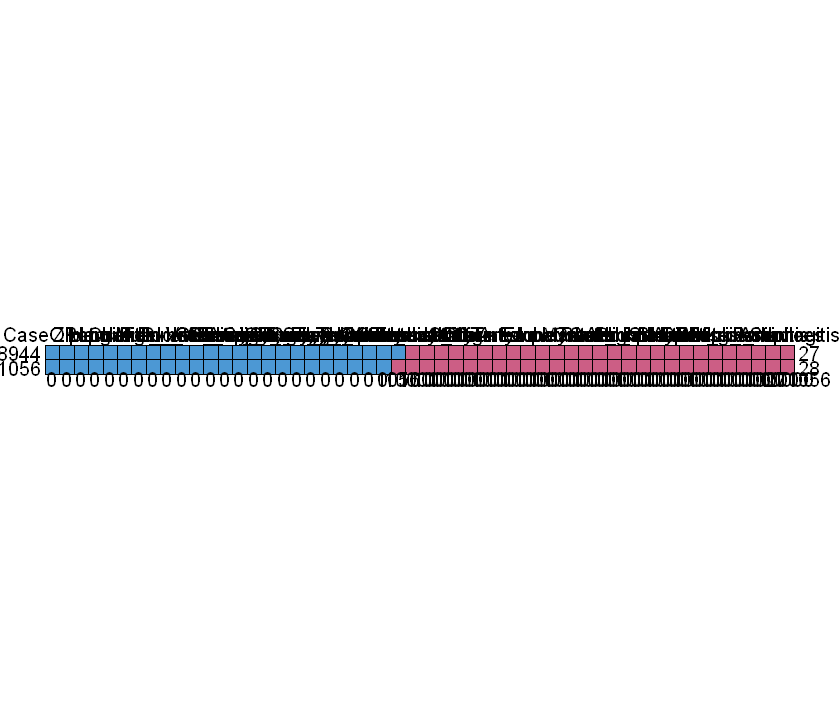

In [55]:
md.pattern(medical_raw_data)

### After taking a look at the visual above, it appears that half of the data has the most missing values. In the following codes, we will look at the columns in depth to see where the missing data is.

I am printing the name of the columns below:

In [56]:
colnames(medical_raw_data)

[1] "CaseOrder"              "Customer_id"            "Interaction"           
 [4] "UID"                    "City"                   "State"                 
 [7] "County"                 "Zip"                    "Lat"                   
[10] "Lng"                    "Population"             "Area"                  
[13] "Timezone"               "Job"                    "Children"              
[16] "Age"                    "Education"              "Employment"            
[19] "Household_Income"       "Marital"                "Gender"                
[22] "ReAdmis"                "VitD_levels"            "Doc_visits"            
[25] "Full_meals_eaten"       "VitD_supp"              "Soft_drink"            
[28] "Initial_admin"          "HighBlood"              "Stroke"                
[31] "Complication_risk"      "Overweight"             "Arthritis"             
[34] "Diabetes"               "Hyperlipidemia"         "BackPain"              
[37] "Anxiety"                "Allergic_rhinitis"      "Reflux_esophagitis"    
[40] "Asthma"                 "Services"               "Initial_days"          
[43] "TotalCharge"            "Additional_charges"     "Survey_TimelyAdmin"    
[46] "Survey_TimelyTreatment" "Survey_TimelyVisits"    "Survey_Reliability"    
[49] "Survey_Options"         "Survey_HoursTreatment"  "Survey_CourteousStaff" 
[52] "Survey_ActiveListening"

I am printing the total number of the columns below:

In [57]:
ncol(medical_raw_data)

[1] 52

I am printing the number of rows below:

In [58]:
nrow(medical_raw_data)

[1] 10000

### NAs will be addressed and/or at the end of the data cleaning process since there are a few more steps I will be taking before throughout the data cleaning process.

# 4- It is crucial to change any non-numeric data (categorical) into numeric data:

In [59]:
medical_raw_data$Customer_id <- as.numeric(medical_raw_data$Customer_id)
medical_raw_data$Interaction <- as.numeric(medical_raw_data$Interaction)
medical_raw_data$UID <- as.numeric(medical_raw_data$UID)
medical_raw_data$City <- as.numeric(medical_raw_data$City)
medical_raw_data$State <- as.numeric(medical_raw_data$State)
medical_raw_data$County <- as.numeric(medical_raw_data$County)
medical_raw_data$Area <- as.numeric(medical_raw_data$Area)
medical_raw_data$Timezone <- as.numeric(medical_raw_data$Timezone)
medical_raw_data$Job <- as.numeric(medical_raw_data$Job)
medical_raw_data$Education <- as.numeric(medical_raw_data$Education)
medical_raw_data$Employment <- as.numeric(medical_raw_data$Employment)
medical_raw_data$Marital <- as.numeric(medical_raw_data$Marital)
medical_raw_data$Gender <- as.numeric(medical_raw_data$Gender)
medical_raw_data$Employment <- as.numeric(medical_raw_data$Employment)
medical_raw_data$ReAdmis <- as.numeric(medical_raw_data$ReAdmis)
medical_raw_data$Soft_drink <- as.numeric(medical_raw_data$Soft_drink)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$Initial_admin)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$HighBlood)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$Stroke)
medical_raw_data$Complication_risk <- as.numeric(medical_raw_data$Complication_risk)
medical_raw_data$Overweight <- as.numeric(medical_raw_data$Overweight)
medical_raw_data$Arthritis <- as.numeric(medical_raw_data$Arthritis)
medical_raw_data$Diabetes <- as.numeric(medical_raw_data$Diabetes)
medical_raw_data$Hyperlipidemia <- as.numeric(medical_raw_data$Hyperlipidemia)
medical_raw_data$BackPain <- as.numeric(medical_raw_data$BackPain)
medical_raw_data$Allergic_rhinitis <- as.numeric(medical_raw_data$Allergic_rhinitis)
medical_raw_data$Reflux_esophagitis <- as.numeric(medical_raw_data$Reflux_esophagitis)
medical_raw_data$Asthma <- as.numeric(medical_raw_data$Asthma)
medical_raw_data$Services <- as.numeric(medical_raw_data$Services)
medical_raw_data$CaseOrder <- as.numeric(medical_raw_data$CaseOrder)
medical_raw_data$Zip <- as.numeric(medical_raw_data$Zip)
medical_raw_data$Population <- as.numeric(medical_raw_data$Population)
medical_raw_data$Children <- as.numeric(medical_raw_data$Children)
medical_raw_data$Age <- as.numeric(medical_raw_data$Age)
medical_raw_data$Doc_visits <- as.numeric(medical_raw_data$Doc_visits)
medical_raw_data$Full_meals_eaten <- as.numeric(medical_raw_data$Full_meals_eaten)
medical_raw_data$VitD_supp  <- as.numeric(medical_raw_data$VitD_supp)
medical_raw_data$HighBlood  <- as.numeric(medical_raw_data$HighBlood)
medical_raw_data$Stroke  <- as.numeric(medical_raw_data$Stroke)
medical_raw_data$Anxiety  <- as.numeric(medical_raw_data$Anxiety)
medical_raw_data$Survey_TimelyAdmin  <- as.numeric(medical_raw_data$Survey_TimelyAdmin)
medical_raw_data$Survey_TimelyTreatment  <- as.numeric(medical_raw_data$Survey_TimelyTreatment)
medical_raw_data$Survey_Reliability  <- as.numeric(medical_raw_data$Survey_Reliability)
medical_raw_data$Survey_Options  <- as.numeric(medical_raw_data$Survey_Options)
medical_raw_data$Survey_HoursTreatment  <- as.numeric(medical_raw_data$Survey_HoursTreatment)
medical_raw_data$Survey_CourteousStaff  <- as.numeric(medical_raw_data$Survey_CourteousStaff)
medical_raw_data$Survey_ActiveListening  <- as.numeric(medical_raw_data$Survey_ActiveListening)

### I will make sure that the data is, indeed, converted all non-numerics into numerics using the following code:

In [60]:
str(medical_raw_data)

tibble [10,000 x 52] (S3: tbl_df/tbl/data.frame)
 $ CaseOrder             : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id           : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Interaction           : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ UID                   : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ City                  : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ State                 : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ County                : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Zip                   : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat                   : num [1:10000] 34.3 30.8 43.5 43.9 37.6 ...
 $ Lng                   : num [1:10000] -86.7 -85.2 -96.6 -93.5 -76.9 ...
 $ Population            : num [1:10000] 2951 11303 17125 2162 5287 ...
 $ Area                  : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Timezone              : num [1:10000] NA NA NA NA NA NA NA NA NA 

##### *Success! All of the variables from the data set that was not numeric are, indeed, numeric.*

# 4- Next, it is also vital to identify outliers using the summary function, boxplots, and check for normal probability using plots to further confirm this.

What does min, 1st quartile, median, mean, 3rd quartile, and max mean?
- Min.: is the minimum value of the data set (per variable)
- 1st Qu.: is the middle value (median) of the lower half of the data (per variable)
- Median: is the mid-point of the data and marks the data in half and demonstrates that divided into two parts. Half is greater than the midpoint and half is less.
- Mean: is the average value of the data.
- 3rd Qu.: is the middle value (median) of the upper half of the data (per variable)
- Max: the high data point of the dataset (per variable), not including any outliers.

## *I will use the summary() function to display all of the NULL values below.*

In [61]:
summary(medical_raw_data)

   CaseOrder      Customer_id     Interaction         UID       
 Min.   :    1   Min.   : NA     Min.   : NA     Min.   : NA    
 1st Qu.: 2501   1st Qu.: NA     1st Qu.: NA     1st Qu.: NA    
 Median : 5000   Median : NA     Median : NA     Median : NA    
 Mean   : 5000   Mean   :NaN     Mean   :NaN     Mean   :NaN    
 3rd Qu.: 7500   3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA    
 Max.   :10000   Max.   : NA     Max.   : NA     Max.   : NA    
                 NA's   :10000   NA's   :10000   NA's   :10000  
      City           State           County           Zip       
 Min.   : NA     Min.   : NA     Min.   : NA     Min.   :  610  
 1st Qu.: NA     1st Qu.: NA     1st Qu.: NA     1st Qu.:27592  
 Median : NA     Median : NA     Median : NA     Median :50207  
 Mean   :NaN     Mean   :NaN     Mean   :NaN     Mean   :50159  
 3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA     3rd Qu.:72412  
 Max.   : NA     Max.   : NA     Max.   : NA     Max.   :99929  
 NA's   :10000   NA's   :

### NULL values are found in the following variables:
- Customer_id
- Interaction
- UID
- City
- State
- County
- Area
- Timezone
- Job 
- Education
- Employment
- Marital
- Gender
- ReAdmis
- Soft_drink    
- Initial_admin  
- HighBlood
- Stroke
- Complication_risk
- Arthritis
- Diabetes
- Hyperlipidemia
- BackPain
- Allergic_rhinitis
- Reflux_esophagitis
- Asthma
- Services

## Next, using the summary from above, I will double-check for outliers using plots.

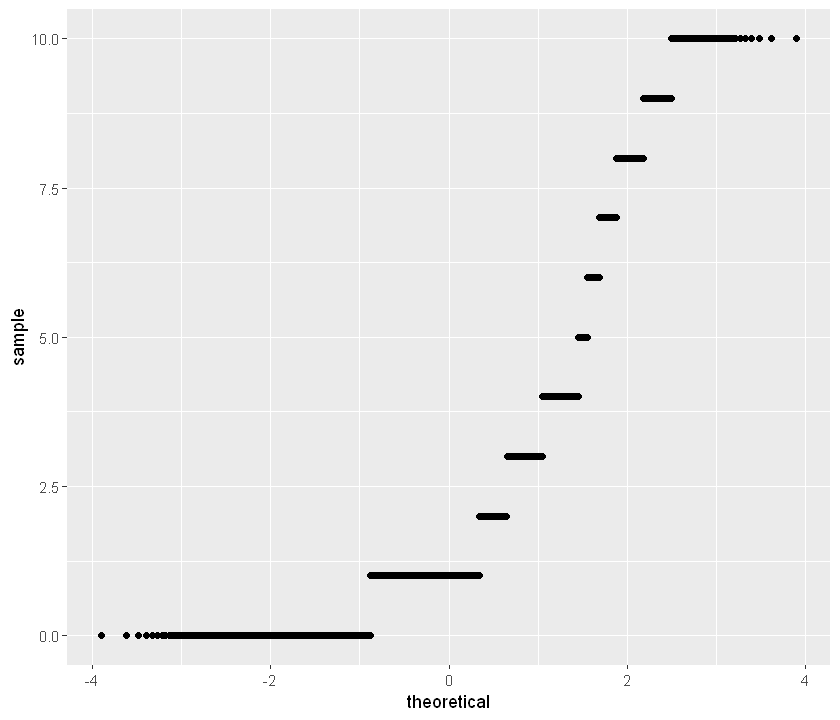

In [62]:
ggplot(medical_raw_data, aes(sample = Children)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

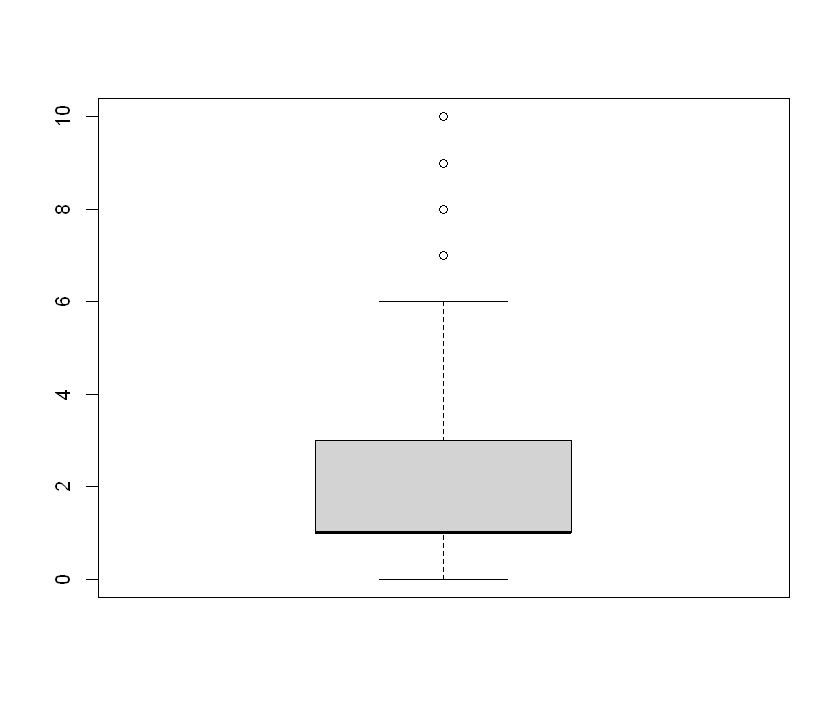

In [63]:
boxplot(medical_raw_data$Children)
options(repr.plot.width=7, repr.plot.height=6)

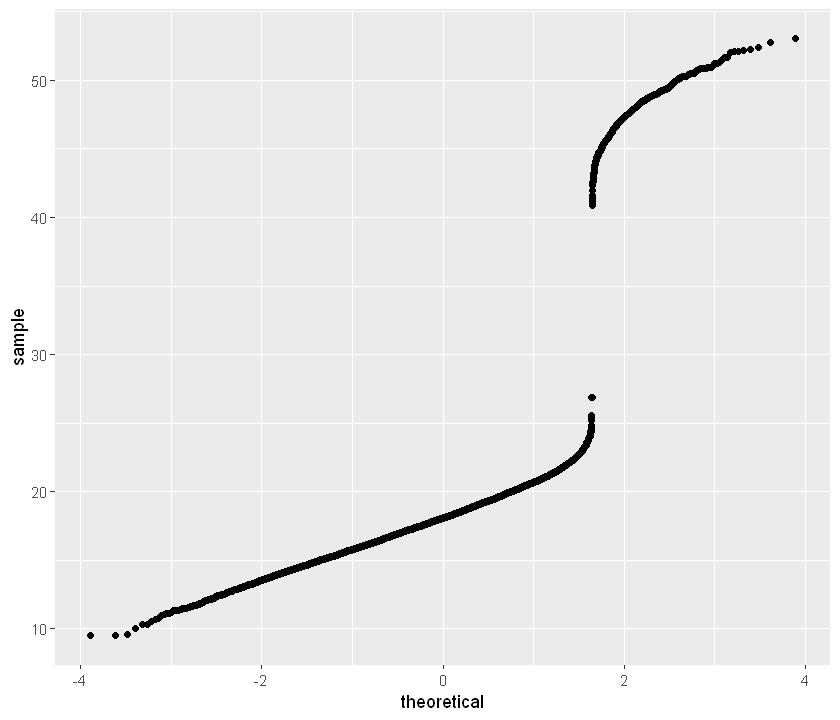

In [65]:
ggplot(medical_raw_data, aes(sample = VitD_levels)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

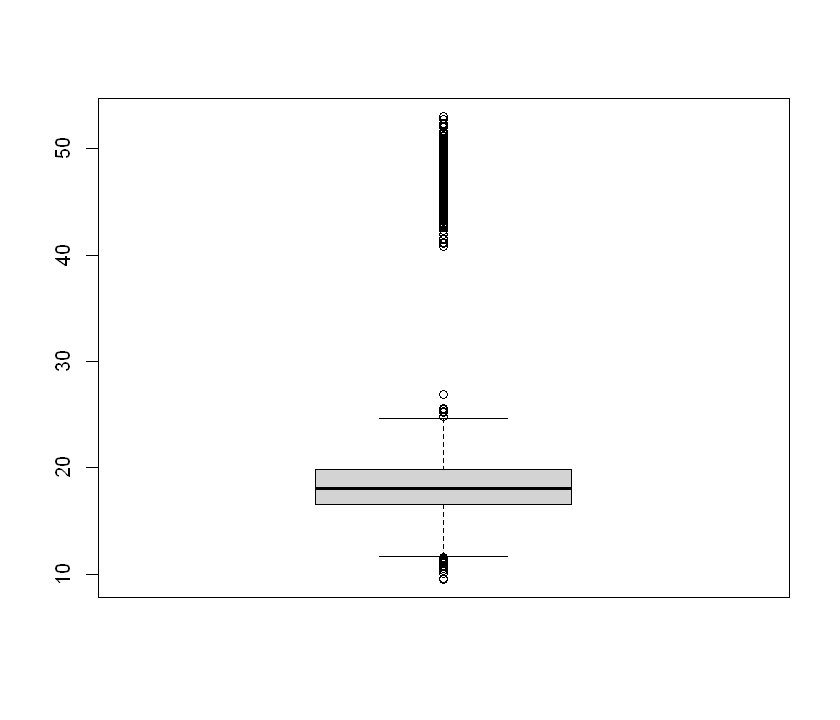

In [66]:
boxplot(medical_raw_data$VitD_levels)
options(repr.plot.width=7, repr.plot.height=6)

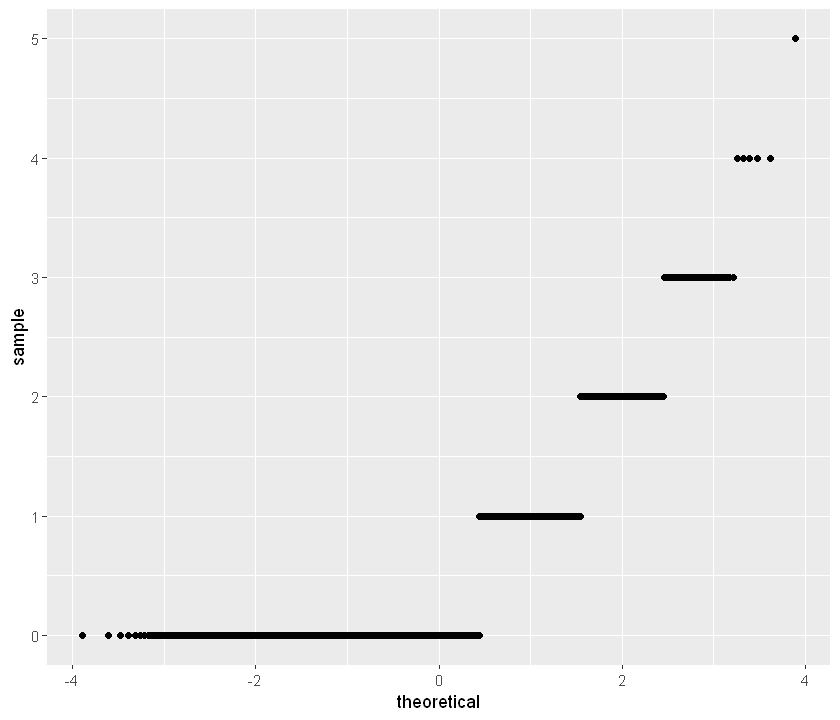

In [67]:
ggplot(medical_raw_data, aes(sample = VitD_supp)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

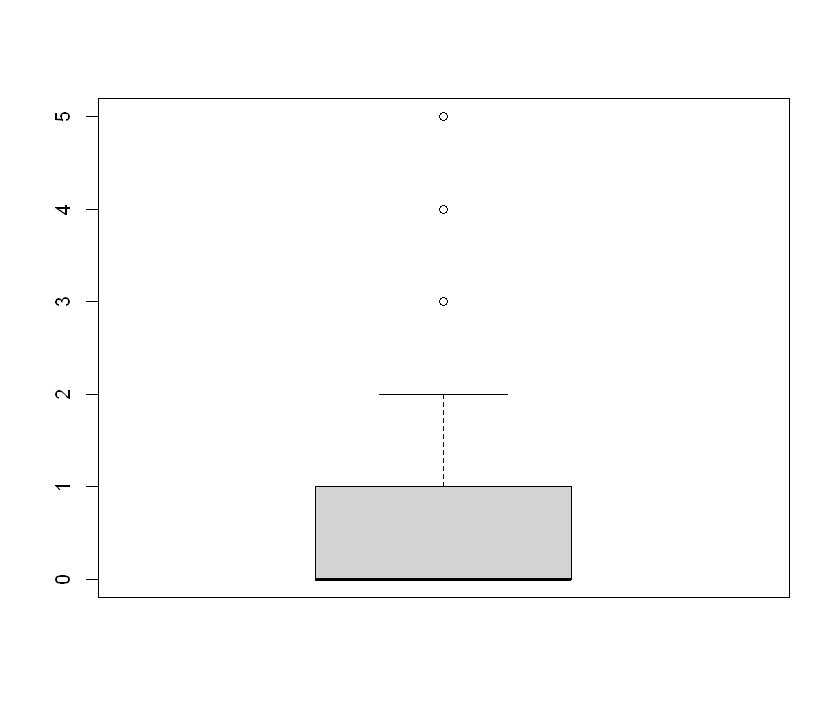

In [68]:
boxplot(medical_raw_data$VitD_supp)
options(repr.plot.width=7, repr.plot.height=6)

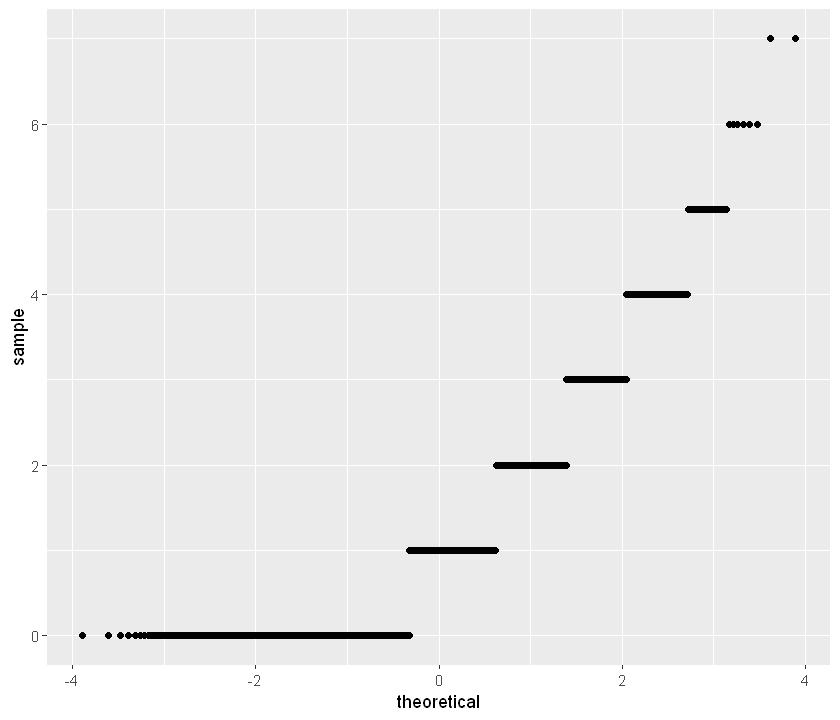

In [69]:
ggplot(medical_raw_data, aes(sample = Full_meals_eaten)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

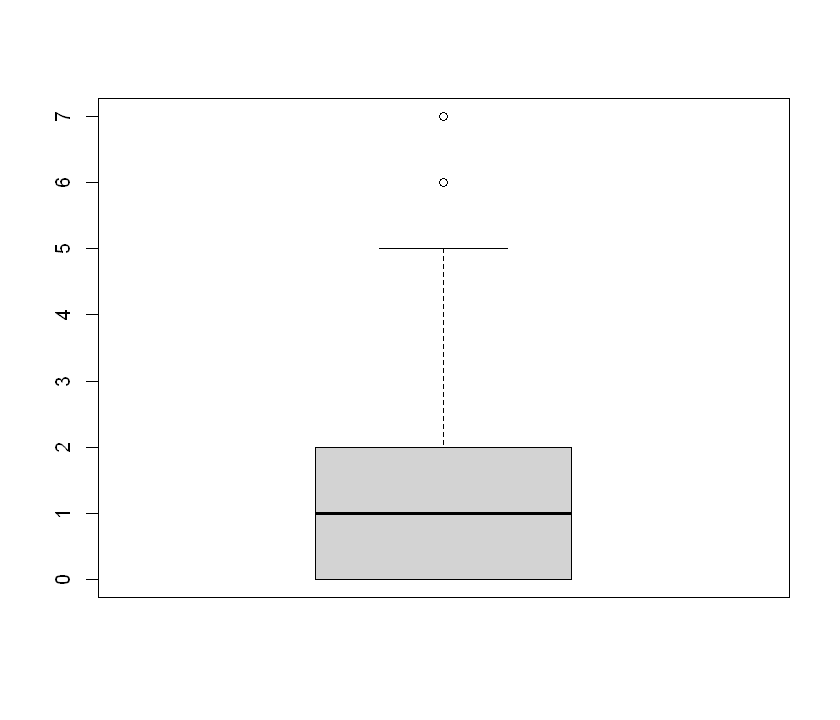

In [70]:
boxplot(medical_raw_data$Full_meals_eaten)
options(repr.plot.width=7, repr.plot.height=6)

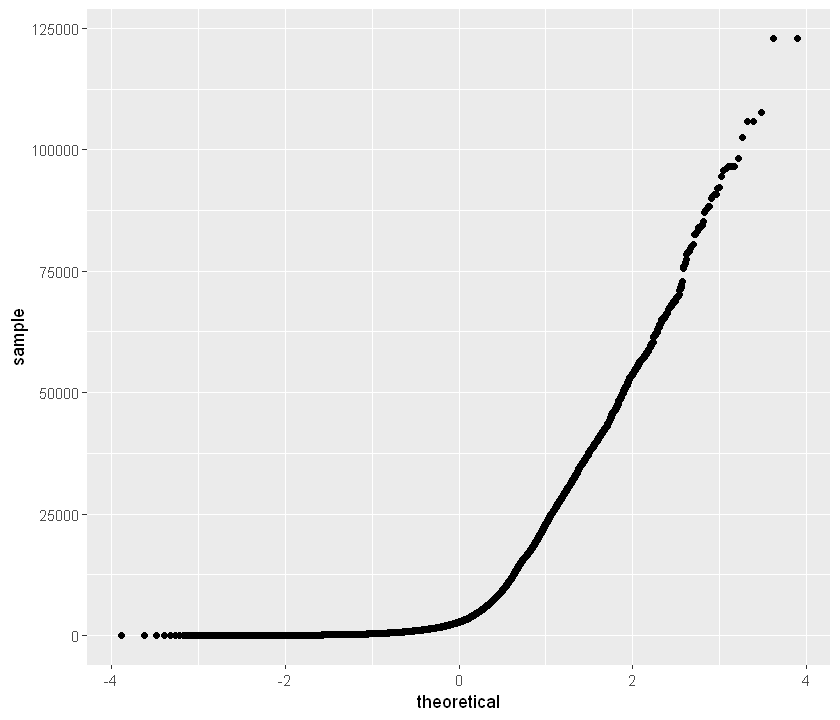

In [71]:
ggplot(medical_raw_data, aes(sample = Population)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

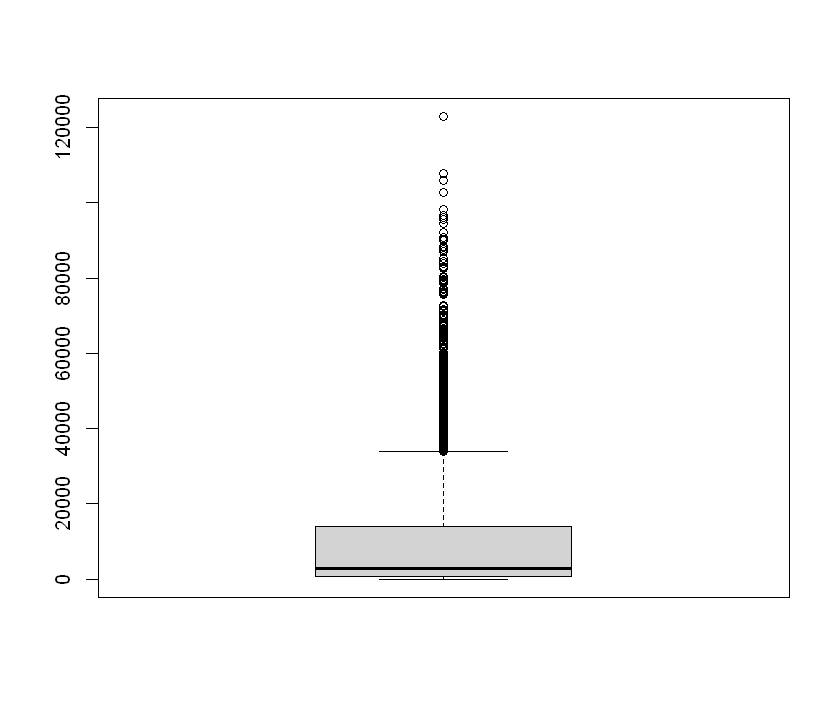

In [72]:
boxplot(medical_raw_data$Population)
options(repr.plot.width=7, repr.plot.height=6)

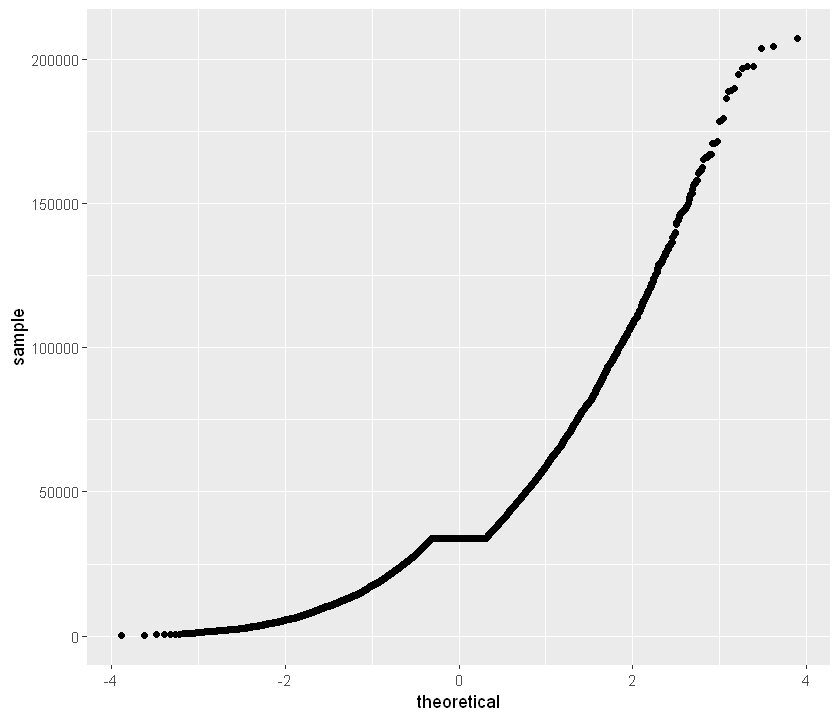

In [73]:
ggplot(medical_raw_data, aes(sample = Household_Income)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

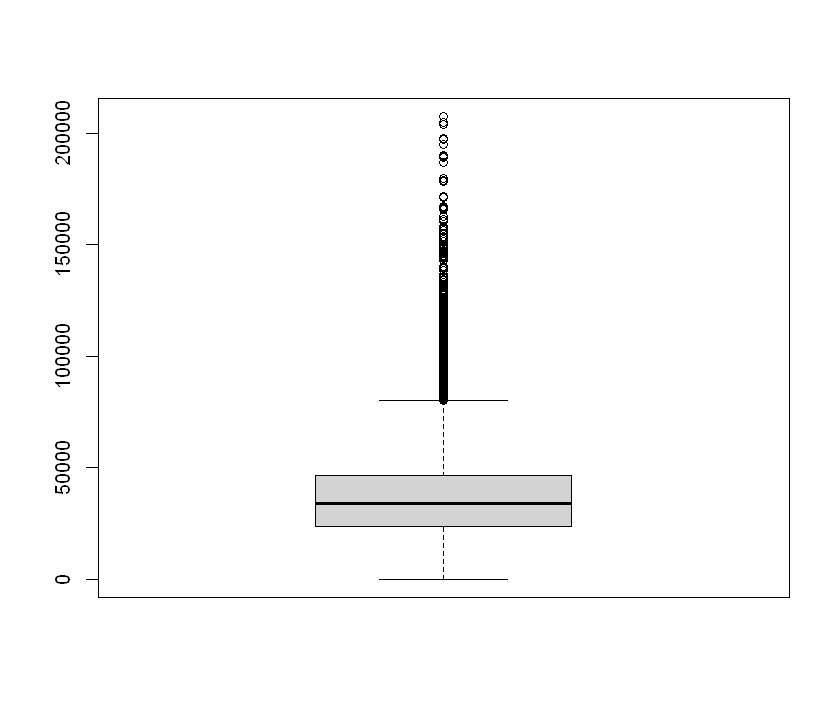

In [74]:
boxplot(medical_raw_data$Household_Income)
options(repr.plot.width=7, repr.plot.height=6)

### The boxplots for the following columns show outliers:
- children
- vitamin D levels
- vitamin D supplements
- full meals eaten
- population
- household income

## 6- Using the summary from above, let's run a hypothesis using the Grubbs test to further confirm for outliers.

In [75]:
x <- medical_raw_data$Children
grubbs.test(x)

x <- medical_raw_data$VitD_levels
grubbs.test(x)

x <- medical_raw_data$VitD_supp
grubbs.test(x)

x <- medical_raw_data$Full_meals_eaten
grubbs.test(x)

x <- medical_raw_data$Children
grubbs.test(x)

x <- medical_raw_data$Population
grubbs.test(x)

x <- medical_raw_data$Household_Income
grubbs.test(x)


	Grubbs test for one outlier

data:  x
G = 4.27028, U = 0.99818, p-value = 0.09681
alternative hypothesis: highest value 10 is an outlier



	Grubbs test for one outlier

data:  x
G = 4.9985, U = 0.9975, p-value = 0.002844
alternative hypothesis: highest value 53.01912416 is an outlier



	Grubbs test for one outlier

data:  x
G = 7.32071, U = 0.99464, p-value = 1.148e-09
alternative hypothesis: highest value 5 is an outlier



	Grubbs test for one outlier

data:  x
G = 5.95030, U = 0.99646, p-value = 1.297e-05
alternative hypothesis: highest value 7 is an outlier



	Grubbs test for one outlier

data:  x
G = 4.27028, U = 0.99818, p-value = 0.09681
alternative hypothesis: highest value 10 is an outlier



	Grubbs test for one outlier

data:  x
G = 7.6122, U = 0.9942, p-value = 1.243e-10
alternative hypothesis: highest value 122814 is an outlier



	Grubbs test for one outlier

data:  x
G = 6.72356, U = 0.99548, p-value = 8.425e-08
alternative hypothesis: highest value 207249.13 is an outlier


##### *A p-value less than 0.05 is statistically significant, in which the null hypothesis is to be rejected.*

##### *A p-value greater than 0.05 is not statistically significant, and the null hypothesis is not rejected.*

##### *The only variable above that was less than 0.05 is VitD_level. All others are not statistically significant*

# 7- The next step is to impute/mitigate the missing NAs because removing them can severely skew the data and cause issues later on when performing further analytics.

In [77]:
medical_raw_data$Children[is.na(medical_raw_data$Children)]<-median(medical_raw_data$Children, na.rm=TRUE)
medical_raw_data$Age[is.na(medical_raw_data$Age)]<-median(medical_raw_data$Age, na.rm=TRUE)
medical_raw_data$Household_Income[is.na(medical_raw_data$Household_Income)]<-median(medical_raw_data$Household_Income, na.rm=TRUE)
medical_raw_data$Overweight[is.na(medical_raw_data$Overweight)]<-median(medical_raw_data$Overweight, na.rm=TRUE)
medical_raw_data$Anxiety[is.na(medical_raw_data$Anxiety)]<-median(medical_raw_data$Anxiety, na.rm=TRUE)
medical_raw_data$Soft_drink[is.na(medical_raw_data$Soft_drink)]<-median(medical_raw_data$Soft_drink, na.rm=TRUE)

### Data Cleaning Limitations, Strengths, and Weaknesses:
*Strengths:*
- Nearly all of the values are numeric, facilitating easier calculations, visualizations, and conversions.
- Multiple variables made it easy to have options with a research question. I saw possibilities with Age, Children, Doc_Visits, Overweight, and many others.
*Weaknesses:*
- We do not have access to the original people who created the data.
- There was a grand part of the data that was missing, eliminating the chances of analyzing *that* part of it.
- Perhaps a better cleaning decision could have been made if we knew the purpose of the data.
- One unclear variable was VitD_supp, which describes the number of times a patient takes the supplement. What we do not know is if this is daily, weekly, or throughout the stay in the facility while admitted.

# Part 3- E: The cleaning process is officially complete! We may now proceed to our final step: The Principal Component Analysis (PCA).
#### *The PCA identifies variance within a data set's variables and makes it easy to explore data to understand key variables and further confirm outliers.*

##### I will take a look at the columns once more to remember in what place the variables I need to work with are.

In [78]:
colnames(medical_raw_data)

[1] "CaseOrder"              "Customer_id"            "Interaction"           
 [4] "UID"                    "City"                   "State"                 
 [7] "County"                 "Zip"                    "Lat"                   
[10] "Lng"                    "Population"             "Area"                  
[13] "Timezone"               "Job"                    "Children"              
[16] "Age"                    "Education"              "Employment"            
[19] "Household_Income"       "Marital"                "Gender"                
[22] "ReAdmis"                "VitD_levels"            "Doc_visits"            
[25] "Full_meals_eaten"       "VitD_supp"              "Soft_drink"            
[28] "Initial_admin"          "HighBlood"              "Stroke"                
[31] "Complication_risk"      "Overweight"             "Arthritis"             
[34] "Diabetes"               "Hyperlipidemia"         "BackPain"              
[37] "Anxiety"                "Allergic_rhinitis"      "Reflux_esophagitis"    
[40] "Asthma"                 "Services"               "Initial_days"          
[43] "TotalCharge"            "Additional_charges"     "Survey_TimelyAdmin"    
[46] "Survey_TimelyTreatment" "Survey_TimelyVisits"    "Survey_Reliability"    
[49] "Survey_Options"         "Survey_HoursTreatment"  "Survey_CourteousStaff" 
[52] "Survey_ActiveListening"

##### In this case, the variables I need are:
- age: 16th place
- doctor visits: 24th place
- overweight: 32nd place

## First, I will conduct standardization on the variables I need to answer my research question which are age, doctor visits, and overweight.

In [79]:
medical_sub <- scale(x = medical_raw_data[,c(16, 24, 32)])
head(medical_sub)

Age,Doc_visits,Overweight
-0.01246539,0.94459928,-1.6769458
-0.12361466,-0.96793217,0.5962626
-0.01246539,-0.96793217,0.5962626
1.37690049,-0.96793217,-1.6769458
-1.73527909,-0.01166644,-1.6769458
1.26575122,0.94459928,0.5962626


#### Standardization is the process of converting data into a format that facilitates usability to process and analyze it.


## The Principal Component Analysis

In [81]:
medical_sub.pca <- PCA(medical_sub, scale.unit=TRUE, graph=F)

## The Scree Plot

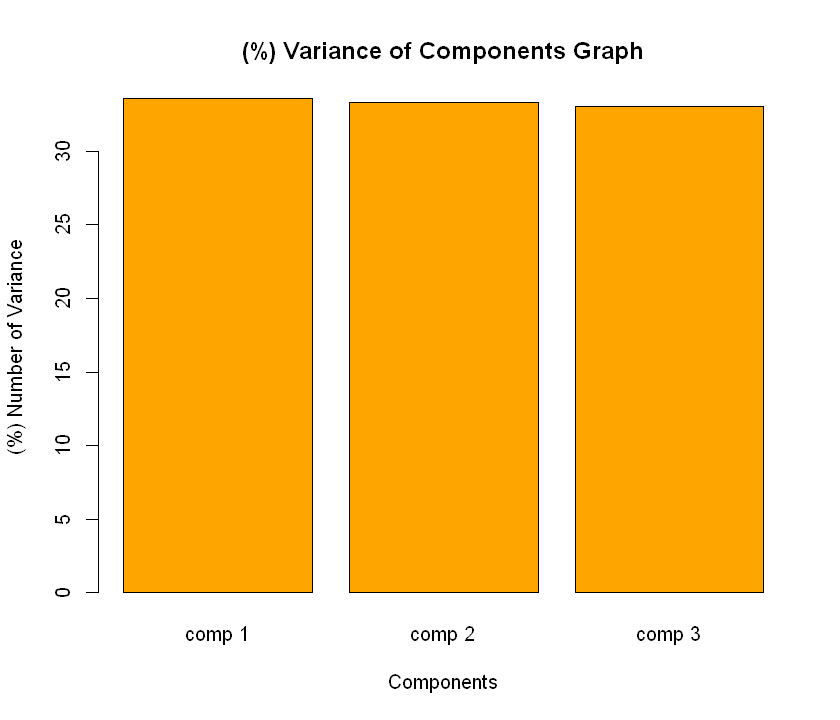

In [82]:
eig.val <- medical_sub.pca$eig

barplot(eig.val[, 2],

        main = "(%) Variance of Components Graph",

        xlab = "Components",

        ylab = "(%) Number of Variance",

        col = "orange")

options(repr.plot.width=8, repr.plot.height=9)

##### Saving the plot to a png file.

In [83]:
ggsave('Variance_graph.png', width=8, height=8)

# PCA Graph of Overweight

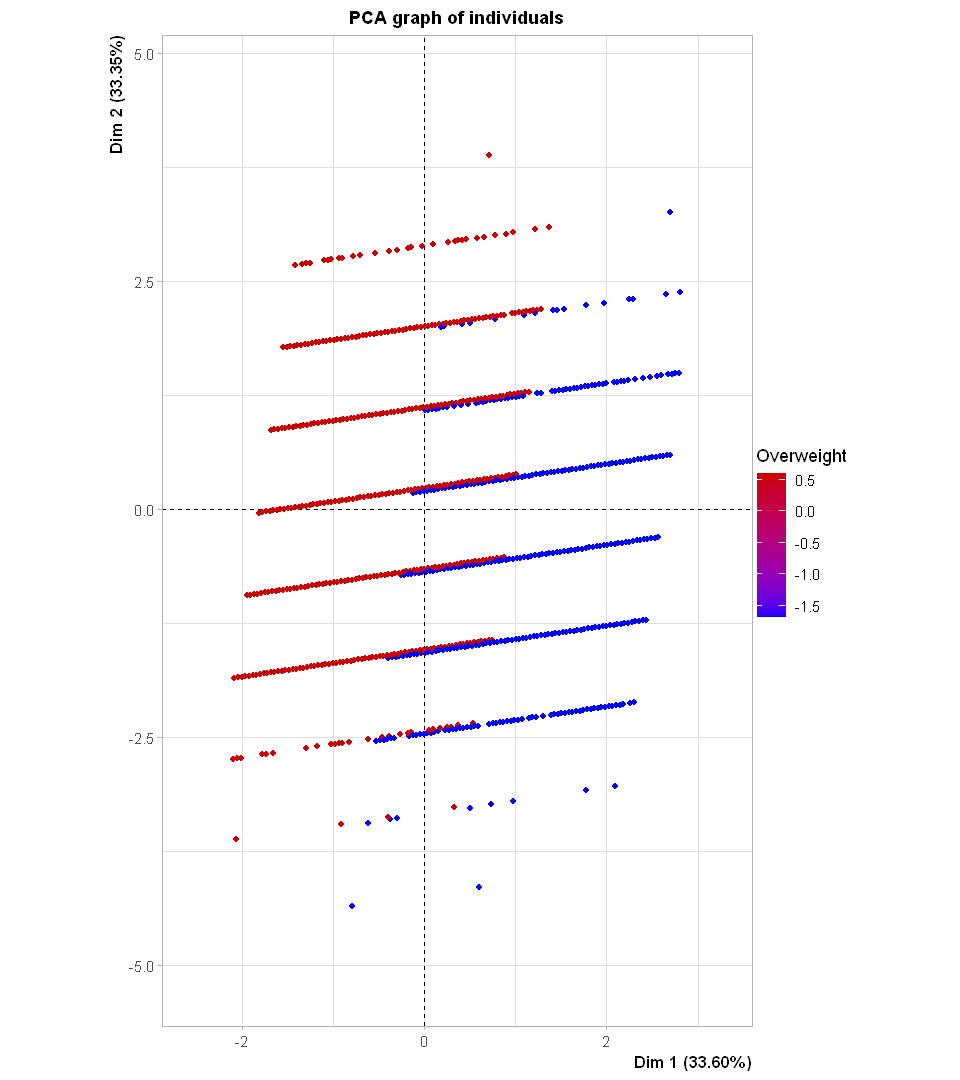

In [84]:
plot(medical_sub.pca, choix = "ind", autoLab = "auto", habillage = "Overweight", col.ind="darkblue", label="var", graph.type = "ggplot")

##### Saving the plot to a png file.

In [85]:
ggsave('PCA_Ind_Graph_Overweight.png', width=8, height=8)

## PCA Graph of Variables

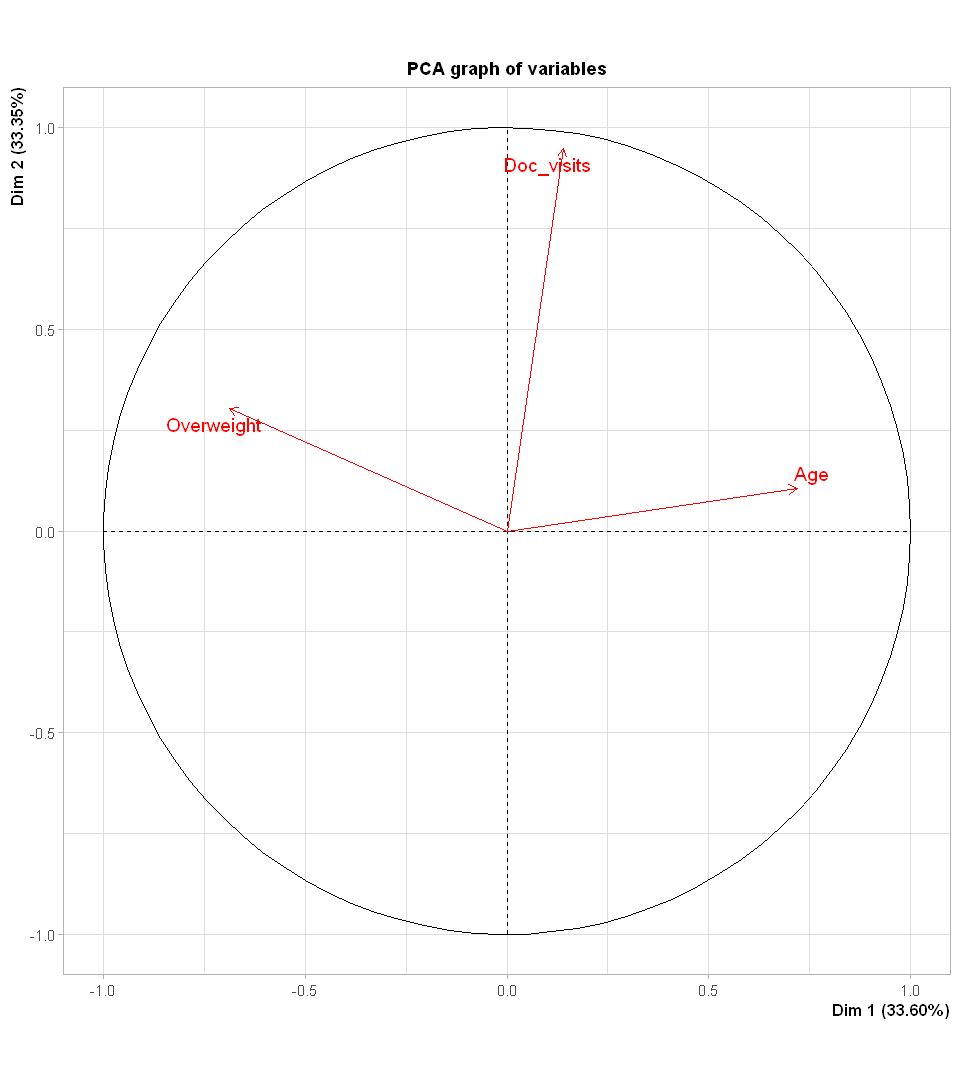

In [86]:
plot(medical_sub.pca, choix = "var", autoLab = "auto", col.var="red", label="var", graph.type = "ggplot", select="cos2 0.40")

##### Saving the plot to a png file.

In [87]:
ggsave('PCA_graph_of_variables.png', width=8, height=8)

# I ran the PCA using the package factoextra and created a scree plot. As a result of the three graphs above, age and doctor visits seem to be correlated. Being overweight, on the other hand, is something that can happen at any given age and correlate with neither age nor doctor visits. Hospitals can benefit from an in-depth analysis, actionable insights, and an attempt to reduce doctor visits by age.

### Finally, the very last step is the write the clean data to CSV using the code below:

In [88]:
write.csv(medical_raw_data, "C://Users//jesse//Documents/WGU/Data Cleaning/Medical_Data/medical_raw_data.csv", row.names = TRUE)